In [1]:
# capitulo 1
import ipympl
%matplotlib widget
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.widgets as widget
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
#from causalgraphicalmodels import CausalGraphicalModel
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def line_intersection(line1, line2):
    # Calcular las diferencias en x e y entre los puntos de las líneas
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    # Calcular el determinante de la matriz formada por las diferencias
    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    # Calcular el determinante total y comprobar si las líneas son paralelas
    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('Las líneas no se intersectan')

    # Calcular las coordenadas del punto de intersección
    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

def generate_equilibrium_plots(Y_size=100, Co=35, Io=40, Xo=2, h=0.7, b=0.8, m=0.2, t=0.3, r=0.9, Go_list=[70, 35]):
    Y = np.arange(Y_size)
    a = 2.5

    def DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y):
        # Ecuación de la Demanda Agregada (DA)
        DA_K = (Co + Io + Go + Xo - h*r) + ((b - m)*(1 - t)*Y)
        return DA_K

    def L_45(a, Y):
        # Ecuación de la línea de 45 grados
        L_45 = a*Y
        return L_45

    def plot_equilibrium(ax, DA, L_45, color, linestyle):
        # Puntos de inicio y fin de las curvas
        A = [DA[0], Y[0]]
        B = [DA[-1], Y[-1]]
        C = [L_45[0], Y[0]]
        D = [L_45[-1], Y[-1]]

        # Encontrar el punto de intersección
        intersec = line_intersection((A, B), (C, D))

        # Graficar la Demanda Agregada (DA)
        ax.plot(Y, DA, color=color, linestyle=linestyle, label="DA")

        # Graficar la línea de 45 grados
        ax.plot(Y, L_45, color="#404040", label="45°")

        # Graficar líneas punteadas hasta el punto de intersección
        ax.plot([min(Y), intersec[1]], [intersec[0], intersec[0]], linestyle=':', color='grey')
        ax.plot([intersec[1], intersec[1]], [min(L_45), intersec[0]], linestyle=':', color="grey")

        return intersec

    # Dimensiones del gráfico
    fig, ax = plt.subplots(figsize=(10, 8))

    intercepts = []

    # Curvas a graficar
    for Go in Go_list:
        DA_curve = DA_K(Co, Io, Go, Xo, h, r, b, m, t, Y)
        L_45_curve = L_45(a, Y)
        intersec = plot_equilibrium(ax, DA_curve, L_45_curve, color="#3D59AB", linestyle='-')
        intercepts.append(intersec)

    # Eliminar las cantidades de los ejes
    ax.yaxis.set_major_locator(plt.NullLocator())   
    ax.xaxis.set_major_locator(plt.NullLocator())

    # Título y leyenda
    ax.set(title="El ingreso de Equilibrio a Corto Plazo", xlabel=r'Y', ylabel=r'DA')
    ax.legend()  # mostrar leyenda
    
    plt.show()

    return intercepts




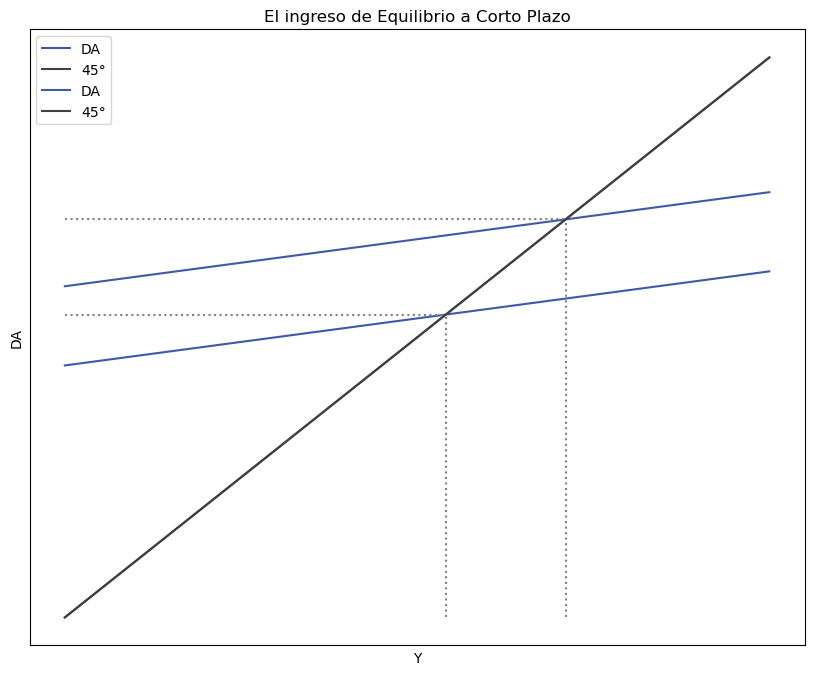

Valores de los interceptos: [(175.9254807692308, 70.37019230769232), (133.8581730769231, 53.54326923076924)]


In [15]:
# Ejemplo de uso
intercept_values = generate_equilibrium_plots()
print("Valores de los interceptos:", intercept_values)